In [17]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [43]:
class UnionFind:

    def __init__(self, n):
        self.count = 0
        self.parent = {i: i for i in range(n)}
        self.size = {i: 1 for i in range(n)}

    # def find(self, p):
    #     if p == self.parent[p]:
    #         return p
    #     # 存在爆栈的风险
    #     self.parent[p] = self.find(self.parent[p])
    #     return p

    def find(self, p):
        while self.parent[p] != p:
            self.parent[p] = self.parent[self.parent[p]]
            p = self.parent[p]
        return p

    def connected(self, p, q):
        return self.find(p) == self.find(q)

    def union(self, p, q):
        root_p = self.find(p)
        root_q = self.find(q)
        if self.size[root_p] < self.size[root_q]:
            self.parent[root_p] = root_q
            self.size[root_q] += self.size[root_p]
        else:
            self.parent[root_q] = root_p
            self.size[root_p] += self.size[root_q]

    # def graph(self):
    #     g = nx.DiGraph()
    #     for u, parent in self.parent.items():
    #         g.add_edge(parent, u)
    #     return g

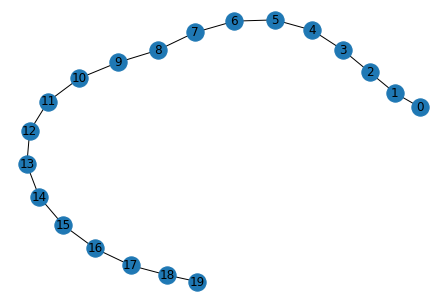

In [44]:
n = 20
g = nx.random_regular_graph(3, n)
g = nx.path_graph(n)
nx.draw(g, with_labels=True)

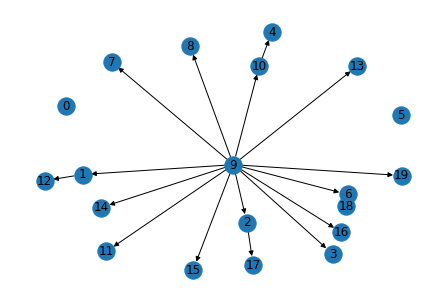

In [45]:
uf = UnionFind(n)
for _ in range(20):
    a, b = random.sample(range(n), 2)
    uf.union(a, b)
plt.figure()
nx.draw(uf.graph(), with_labels=True)

要注意两点
    1. 路径压缩：
    2. size数组：把小树放在大树下

### 130. Surrounded Regions
Given a 2D board containing 'X' and 'O' (the letter O), capture all regions surrounded by 'X'.

A region is captured by flipping all 'O's into 'X's in that surrounded region.

Example:

After running your function, the board should be:

先用最直接的dfs来做。


In [102]:
from itertools import product

class Solution:
    def solve(self, board) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        if not board: return
        self.m, self.n = len(board), len(board[0])
        def dfs(i, j):
            if i < 0 or i == self.m or j < 0 or j == self.n or board[i][j] in ['X', 'E']:
                return False
            board[i][j] = 'E'
            dfs(i+1, j)
            dfs(i-1, j)
            dfs(i, j+1)
            dfs(i, j-1)

        """
        这里非常低效，可以尝试itertools的product，例如：
        list(product(['a', 'b'], range(3)))
        """

        for i in range(self.m):
            for j in range(self.n):
                if i == 0 or i == self.m-1 or j == 0 or j == self.n-1:
                    if board[i][j] == 'O':
                        dfs(i, j)

        for i in range(self.m):
            for j in range(self.n):
                if board[i][j] == 'E':
                    board[i][j] = 'O'
                elif board[i][j] == 'O':
                    board[i][j] = 'X'

In [103]:
input = [["X","X","X","X"],
         ["X","O","O","X"],
         ["X","X","O","X"],
         ["X","O","X","X"]]

Solution().solve(input)

for a in input:
    print(a)

['X', 'X', 'X', 'X']
['X', 'X', 'X', 'X']
['X', 'X', 'X', 'X']
['X', 'O', 'X', 'X']


用并查集来做

In [103]:
class Solution:
    def solve(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        if not board: return
        m, n = len(board), len(board[0])
        dummy = m*n
        uf = UnionFind(m*n+1)
        for i in range(m):
            for j in [0, n-1]:
                if board[i][j] == 'O':
                    uf.union(i*n+j, dummy)

        for j in range(n):
            for i in [0, m-1]:
                if board[i][j] == 'O':
                    uf.union(i*n+j, dummy)

        d = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        for i in range(1, m-1):
            for j in range(1, n-1):
                if board[i][j] == 'O':
                    for mi, mj in d:
                        i1, j1 = i+mi, j+mj
                        if board[i1][j1] == 'O':
                            uf.union(i1*n+j1, i*n+j)

        for i in range(1, m-1):
            for j in range(1, n-1):
                if not uf.connected(i*n+j, dummy):
                    board[i][j] = 'X'



## 200. Number of islands.

Given an m x n 2d grid map of '1's (land) and '0's (water), return the number of islands.

An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.


In [1]:
class UnionFind:

    def __init__(self, grid):
        self.count = 0
        self.parent = dict()
        self.size = dict()
        self.count = 0
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == '1':
                    self.parent[(i, j)] = (i, j)
                    self.size[(i, j)] = 1
                    self.count += 1

    def find(self, p):
        while self.parent[p] != p:
            self.parent[p] = self.parent[self.parent[p]]
            p = self.parent[p]
        return p

    def connected(self, p, q):
        return self.find(p) == self.find(q)

    def union(self, p, q):
        root_p = self.find(p)
        root_q = self.find(q)
        if root_p == root_q:
            return
        self.count -= 1
        if self.size[root_p] < self.size[root_q]:
            self.parent[root_p] = root_q
            self.size[root_q] += self.size[root_p]
        else:
            self.parent[root_q] = root_p
            self.size[root_p] += self.size[root_q]


class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        if not grid: return 0
        m, n = len(grid), len(grid[0])
        uf = UnionFind(grid)
        d = [(-1, 0), (1, 0), (0, 1), (0, -1)]
        for i in range(m):
            for j in range(n):
                if grid[i][j] != '1':
                    continue
                grid[i][j] = '0'
                for mi, mj in d:
                    i1, j1 = i + mi, j + mj
                    if i1 < 0 or i1 == m or j1 < 0 or j1 == n \
                        or grid[i1][j1] == '0':
                        continue
                    uf.union((i, j), (i1, j1))
        return uf.count

NameError: name 'List' is not defined

### 547. Number of Provinces

In [ ]:


class UnionFind:

    def __init__(self, g):
        self.n = len(g)
        self.count = self.n
        self.parent = [i for i in range(self.n)]
        self.size = [1 for _ in range(self.n)]

    def find(self, p):
        while p != self.parent[p]:
            self.parent[p] = self.parent[self.parent[p]]
            p = self.parent[p]
        return p

    def connected(self, p, q):
        return self.find(p) == self.find(q)

    def union(self, p, q):
        root_p, root_q = self.find(p), self.find(q)
        self.count -= 1
        if self.size[root_p] < self.size[root_q]:
            self.parent[root_p] = root_q
            self.size[root_q] += self.size[root_p]
        else:
            self.parent[root_q] = root_p
            self.size[root_p] += self.size[root_q]


class Solution:
    def findCircleNum(self, isConnected: List[List[int]]) -> int:
        if not isConnected: return 0
        uf = UnionFind(isConnected)
        n = len(isConnected)
        for i in range(n):
            for j in range(n):
                if isConnected[i][j] and not uf.connected(i, j):
                    uf.union(i, j)
        return uf.count